Socila circles: Twitter
This dataset consists of 'circles' (or 'lists') from Twitter. 
Twitter data was crawled from public sources. 
The dataset includes node features (profiles), circles, and ego networks.

First we look at the info of the full datatset and then we view a sample from this dataset so that we can create a subset of it:

This process takes some time...

In [20]:
import networkx as nx
import random
from networkx.algorithms.distance_measures import diameter

file_path = "twitter_combined.txt"  # Replace with your dataset path
G = nx.read_edgelist(file_path)

# Create a subset of the graph (Example: nodes with degree > 50)
degree_threshold = 50
subset_nodes = [node for node, degree in dict(G.degree()).items() if degree > degree_threshold]
s_G = G.subgraph(subset_nodes)

# Find a central node in the subset (e.g., based on degree centrality)
degree_centrality = nx.degree_centrality(s_G)
central_node = max(degree_centrality, key=degree_centrality.get)
print("Central node:", central_node)

# Extract the ego network for the central node
subset_G = nx.ego_graph(s_G, central_node, radius=2)

# Helper: Compute metrics safely with progress logs
def compute_metric(name, func, *args, **kwargs):
    try:
        print(f"Computing {name}...")
        return func(*args, **kwargs)
    except Exception as e:
        print(f"Error computing {name}: {e}")
        return "N/A"

def approximate_diameter(graph, sample_size=100):
    nodes = list(graph.nodes())
    sampled_nodes = random.sample(nodes, min(sample_size, len(nodes)))
    max_eccentricity = 0
    
    for node in sampled_nodes:
        eccentricity = max(nx.single_source_shortest_path_length(graph, node).values())
        max_eccentricity = max(max_eccentricity, eccentricity)
    
    return max_eccentricity

approx_diameter = approximate_diameter(subset_G)    


# Compute metrics for the subset
subset_metrics = {
    "Nodes": subset_G.number_of_nodes(),
    "Edges": subset_G.number_of_edges(),
    "Nodes in largest WCC": compute_metric("Nodes in largest WCC", lambda g: len(max(nx.connected_components(g), key=len)), subset_G),
    "Edges in largest WCC": compute_metric("Edges in largest WCC", lambda g: subset_G.subgraph(max(nx.connected_components(g), key=len)).number_of_edges(), subset_G),
    "Average clustering coefficient": compute_metric("Average clustering coefficient", nx.average_clustering, subset_G),
    "Number of triangles": compute_metric("Number of triangles", lambda g: sum(nx.triangles(g).values()) // 3, subset_G),
    "Fraction of closed triangles": compute_metric("Fraction of closed triangles", nx.transitivity, subset_G),
    "Approximate diameter": compute_metric("Approximate diameter", approximate_diameter, subset_G),
    }

# Output the subset metrics
print("\nSubset Metrics:")
for key, value in subset_metrics.items():
    print(f"{key}: {value}")


Central node: 3359851
Computing Nodes in largest WCC...
Computing Edges in largest WCC...
Computing Average clustering coefficient...
Computing Number of triangles...
Computing Fraction of closed triangles...
Computing Approximate diameter...

Subset Metrics:
Nodes: 10893
Edges: 434951
Nodes in largest WCC: 10893
Edges in largest WCC: 434951
Average clustering coefficient: 0.4771744575077681
Number of triangles: 5914350
Fraction of closed triangles: 0.24902825848726348
Approximate diameter: 4


In [21]:
import networkx as nx
from sklearn.metrics import balanced_accuracy_score, f1_score

# Step 2: Generate dummy ground truth and predictions (example)
def generate_labels_and_predictions(graph):
    # Simulating ground truth and predictions for nodes
    ground_truth = {node: 1 if graph.degree[node] > 60 else 0 for node in graph.nodes()}
    predictions = {node: 1 if graph.degree[node] > 55 else 0 for node in graph.nodes()}
    return ground_truth, predictions

# Step 3: Calculate BER and F1 Score
def calculate_metrics(ground_truth, predictions):
    y_true = list(ground_truth.values())  # Ground truth labels
    y_pred = list(predictions.values())  # Model predictions
    
    # Compute metrics
    ber = 1 - balanced_accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"Balanced Error Rate (BER): {ber}")
    print(f"F1 Score: {f1}")
    return ber, f1

# Main function to execute the analysis
def main():
    
    # Generate ground truth and predictions
    ground_truth, predictions = generate_labels_and_predictions(subset_G)

    # Calculate metrics
    calculate_metrics(ground_truth, predictions)

if __name__ == "__main__":
    main()

Balanced Error Rate (BER): 0.05070136893696131
F1 Score: 0.9431387414708112


In [25]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community import label_propagation_communities

# Detect communities using Label Propagation
communities = list(label_propagation_communities(subset_G))

# Assign colors to nodes based on their community
community_map = {node: idx for idx, community in enumerate(communities) for node in community}
node_colors = [community_map[node] for node in subset_G.nodes()]

# Generate layout for nodes (only for nodes in subset_G)
pos = nx.spring_layout(subset_G)

# Visualize the graph with community coloring
plt.figure(figsize=(10, 8))
nx.draw(
    subset_G, pos,
    node_color=node_colors,
    with_labels=True,
    cmap=plt.cm.rainbow,
    node_size=500
)
plt.title("Communities Detected Using Label Propagation")
plt.show()



KeyboardInterrupt: 

In [ ]:
G = subset_G.copy()
bcents = nx.edge_betweenness_centrality(G)

for k in list(bcents.keys())[:5]: print(k, "->", bcents[k])
print("...")
for k in list(bcents.keys())[-5:]: print(k, "->", bcents[k])
my_edge_betweenness = nx.edge_betweenness_centrality(G)
my_edge_betweenness[(0, 1)]
my_edge_betweenness.get((0, 1))
max(my_edge_betweenness, key=my_edge_betweenness.get)
max(G.edges(), key=my_edge_betweenness.get)
my_edge_betweenness = nx.edge_betweenness_centrality(G)
most_valuable_edge = max(G.edges(), key=my_edge_betweenness.get)
G.remove_edge(*most_valuable_edge)
nx.connected_components(G)
partition_sequence = []
for _ in range(G.number_of_edges()):
    my_edge_betweenness = nx.edge_betweenness_centrality(G)
    most_valuable_edge = max(G.edges(), key=my_edge_betweenness.get)
    G.remove_edge(*most_valuable_edge)
    my_partition = list(nx.connected_components(G))
    partition_sequence.append(my_partition)
len(partition_sequence), nx.karate_club_graph().number_of_edges()
len(partition_sequence[0])
len(partition_sequence[-1]), nx.karate_club_graph().number_of_nodes()
modularity_sequence = [modularity(G, p) for p in partition_sequence]
plt.plot(modularity_sequence)
plt.ylabel('Modularity')
plt.xlabel('Algorithm step')
mods= np.array([nx.community.quality.modularity(G, part) for part in partition_sequence])
max_index = np.argmax(mods)
print("Maximum modularity: %7.4f at %d partitions" % (mods[max_index], len(partition_sequence[max_index])))
best_partition=partition_sequence[max_index]
best_partition
best_partition_map = make_partition_map(best_partition)

node_colors = [best_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)
nx.community.quality.modularity(G, best_partition)
for partition in partition_sequence:
    if len(partition) == 2:
        two_cluster_partition = partition
        break

two_cluster_partition
two_cluster_partition_map = make_partition_map(two_cluster_partition)

node_colors = [two_cluster_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)
nx.community.quality.modularity(G, two_cluster_partition)
import matplotlib.pyplot as plt

pos = nx.layout.spring_layout(G)
fig = plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
two_cluster_partition_map = make_partition_map(two_cluster_partition)
node_colors = [two_cluster_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, pos=pos)
plt.title('Predicted communities')

plt.subplot(1, 2, 2)
node_colors = [G.nodes[n]['club'] == 'Officer' for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, pos=pos)
plt.title('Actual communities')
plt.show()

In [28]:
import community as community_louvain

# Detect communities using the Louvain method
partition = community_louvain.best_partition(subset_G)

# Assign colors to nodes based on their community
node_colors = [partition[node] for node in subset_G.nodes()]

# Draw the graph
nx.draw(
    subset_G, pos,
    node_color=node_colors,
    with_labels=True,
    cmap=plt.cm.rainbow,
    node_size=500
)
plt.title("Communities Detected Using Louvain Method")
plt.show()


ModuleNotFoundError: No module named 'community'

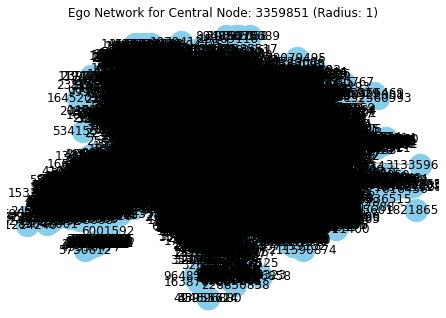

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Subset is already created: `subset_G` (Ego network around central_node)

# Visualize the ego network
def visualize_ego_network(graph, central_node, radius):
    # Spring layout for better visualization
    pos = nx.spring_layout(graph)

    # Draw all nodes and edges
    nx.draw(
        graph, pos,
        with_labels=True,
        node_size=500,
        node_color="skyblue",
        edge_color="gray"
    )

    # Highlight the central node
    nx.draw_networkx_nodes(
        graph, pos,
        nodelist=[central_node],
        node_color="red",
        node_size=700
    )

    # Add a title
    plt.title(f"Ego Network for Central Node: {central_node} (Radius: {radius})")
    plt.show()

# Call the visualization function
visualize_ego_network(subset_G, central_node, radius=1)
